In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
# Memuat dataset
# Asumsikan `world_layoffs_df` adalah DataFrame yang berisi data dari `world_layoffs.layoffs_staging2`
world_layoffs_df = pd.read_csv('Layoffs_1.csv')

# Analisis Data Eksploratif (EDA)


In [43]:
# Menampilkan beberapa baris pertama dari dataset
print(world_layoffs_df.head())

     company       location     industry  total_laid_off  percentage_laid_off  \
0  Atlassian         Sydney        Other           500.0                 0.05   
1   SiriusXM  New York City        Media           475.0                 0.08   
2     Alerzo         Ibadan       Retail           400.0                  NaN   
3     UpGrad         Mumbai    Education           120.0                  NaN   
4       Loft      Sao Paulo  Real Estate           340.0                 0.15   

       date     stage        country  funds_raised_millions  
0  3/6/2023  Post-IPO      Australia                  210.0  
1  3/6/2023  Post-IPO  United States                  525.0  
2  3/6/2023  Series B        Nigeria                   16.0  
3  3/6/2023   Unknown          India                  631.0  
4  3/3/2023   Unknown         Brazil                  788.0  


In [44]:
# Jumlah maksimum PHK
max_total_laid_off = world_layoffs_df['total_laid_off'].max()
print(f'Jumlah maksimum PHK: {max_total_laid_off}')

Jumlah maksimum PHK: 12000.0


In [45]:
# Persentase PHK maksimum dan minimum (mengabaikan NULL)
max_percentage_laid_off = world_layoffs_df['percentage_laid_off'].max()
min_percentage_laid_off = world_layoffs_df['percentage_laid_off'].min()
print(f'Persentase PHK maksimum: {max_percentage_laid_off}')
print(f'Persentase PHK minimum: {min_percentage_laid_off}')

Persentase PHK maksimum: 1.0
Persentase PHK minimum: 0.0


In [46]:
# Perusahaan dengan 100% PHK
full_laid_off_companies = world_layoffs_df[world_layoffs_df['percentage_laid_off'] == 1]
print(full_laid_off_companies)

            company       location        industry  total_laid_off  \
17          Kandela    Los Angeles        Consumer             NaN   
29    DUX Education      Bengaluru       Education             NaN   
60       Locomation     Pittsburgh  Transportation             NaN   
72           Fipola        Chennai            Food             NaN   
104     EMX Digital  New York City       Marketing           100.0   
...             ...            ...             ...             ...   
2339        Service    Los Angeles          Travel             NaN   
2342         Ejento    SF Bay Area      Recruiting            84.0   
2346          Popin  New York City         Fitness             NaN   
2350       Help.com         Austin         Support            16.0   
2351        Service    Los Angeles          Travel             NaN   

      percentage_laid_off       date     stage        country  \
17                    1.0   3/2/2023  Acquired  United States   
29                    1.0  2/

In [47]:
# Perusahaan dengan 100% PHK diurutkan berdasarkan dana yang terkumpul
full_laid_off_companies_ordered = full_laid_off_companies.sort_values(by='funds_raised_millions', ascending=False)
print(full_laid_off_companies_ordered)


                  company       location        industry  total_laid_off  \
340           Britishvolt         London  Transportation           206.0   
1741                Quibi    Los Angeles           Media             NaN   
699   Deliveroo Australia      Melbourne            Food           120.0   
1694              Katerra    SF Bay Area    Construction          2434.0   
631               BlockFi  New York City          Crypto             NaN   
...                   ...            ...             ...             ...   
1882           Dotscience         London         Product            10.0   
1928           Airy Rooms        Jakarta          Travel             NaN   
1991                Stoqo        Jakarta            Food           250.0   
2212           The Modist          Dubai          Retail             NaN   
2342               Ejento    SF Bay Area      Recruiting            84.0   

      percentage_laid_off        date           stage               country  \
340     

# Visualisasi

C:\Users\restu firmansyah\AppData\Local\Temp\ipykernel_13428\574810994.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=biggest_single_layoff, x='total_laid_off', y='company', palette='viridis')


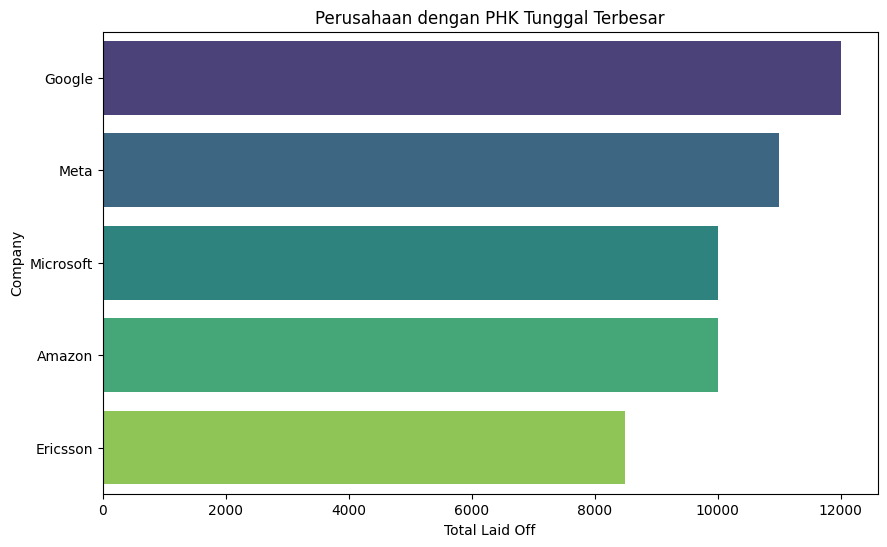

In [48]:
# Perusahaan dengan PHK tunggal terbesar
biggest_single_layoff = world_layoffs_df[['company', 'total_laid_off']].sort_values(by='total_laid_off', ascending=False).head(5)
plt.figure(figsize=(10, 6))
sns.barplot(data=biggest_single_layoff, x='total_laid_off', y='company', palette='viridis')
plt.title('Perusahaan dengan PHK Tunggal Terbesar')
plt.xlabel('Total Laid Off')
plt.ylabel('Company')
plt.show()

C:\Users\restu firmansyah\AppData\Local\Temp\ipykernel_13428\2668406902.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_layoffs_by_company, x='total_laid_off', y='company', palette='magma')


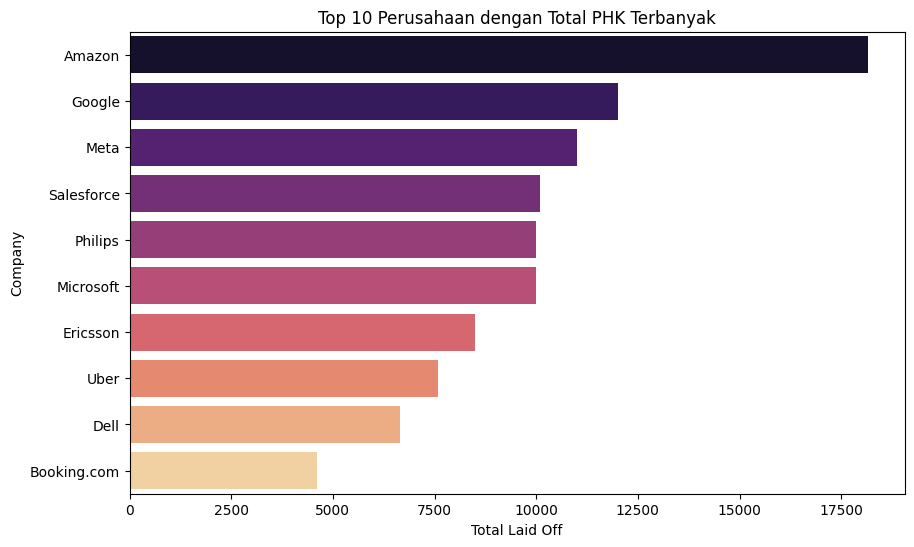

In [49]:
# Perusahaan dengan jumlah total PHK terbanyak
total_layoffs_by_company = world_layoffs_df.groupby('company')['total_laid_off'].sum().reset_index().sort_values(by='total_laid_off', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(data=total_layoffs_by_company, x='total_laid_off', y='company', palette='magma')
plt.title('Top 10 Perusahaan dengan Total PHK Terbanyak')
plt.xlabel('Total Laid Off')
plt.ylabel('Company')
plt.show()

C:\Users\restu firmansyah\AppData\Local\Temp\ipykernel_13428\3835945173.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_layoffs_by_location, x='total_laid_off', y='location', palette='coolwarm')


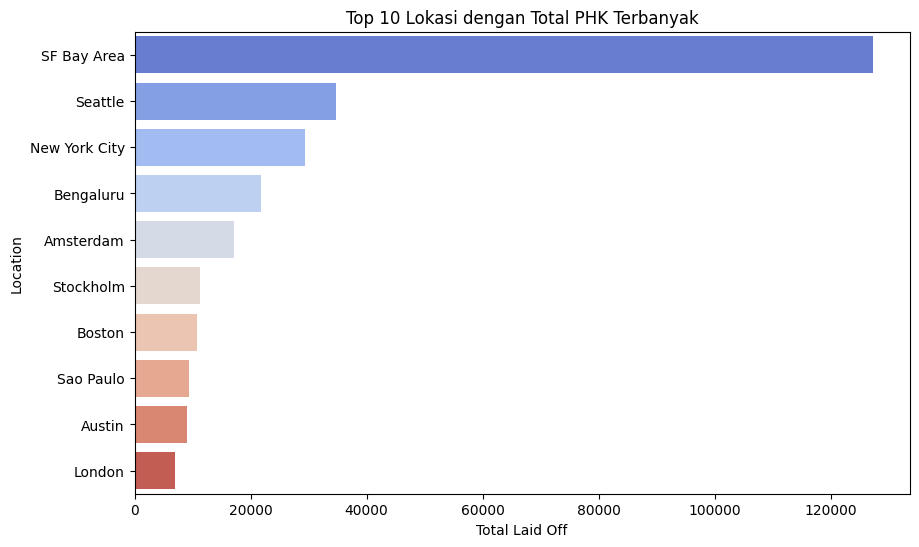

In [50]:
# Total PHK berdasarkan lokasi
total_layoffs_by_location = world_layoffs_df.groupby('location')['total_laid_off'].sum().reset_index().sort_values(by='total_laid_off', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(data=total_layoffs_by_location, x='total_laid_off', y='location', palette='coolwarm')
plt.title('Top 10 Lokasi dengan Total PHK Terbanyak')
plt.xlabel('Total Laid Off')
plt.ylabel('Location')
plt.show()

C:\Users\restu firmansyah\AppData\Local\Temp\ipykernel_13428\1774859670.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_layoffs_by_country, x='total_laid_off', y='country', palette='rocket')


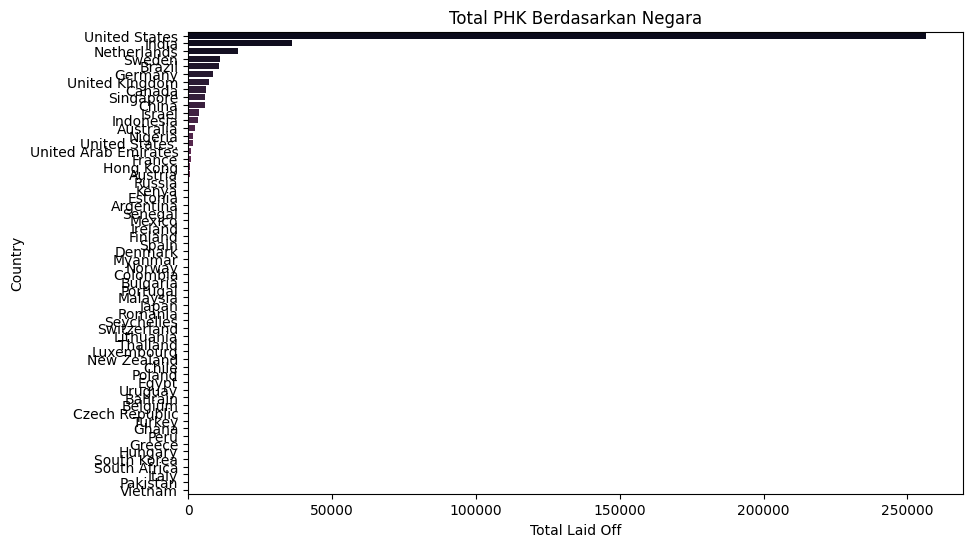

In [51]:
# Total PHK berdasarkan negara
total_layoffs_by_country = world_layoffs_df.groupby('country')['total_laid_off'].sum().reset_index().sort_values(by='total_laid_off', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(data=total_layoffs_by_country, x='total_laid_off', y='country', palette='rocket')
plt.title('Total PHK Berdasarkan Negara')
plt.xlabel('Total Laid Off')
plt.ylabel('Country')
plt.show()

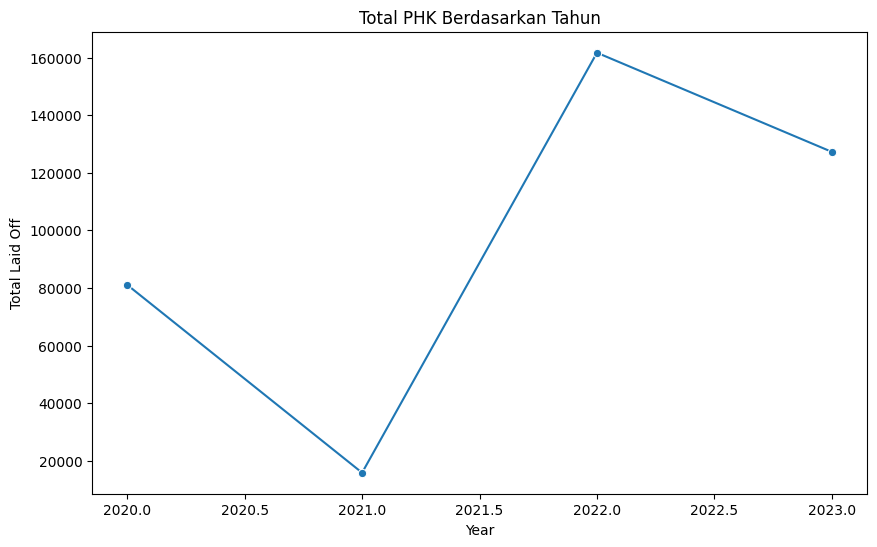

In [52]:
# Total PHK berdasarkan tahun
world_layoffs_df['year'] = pd.to_datetime(world_layoffs_df['date']).dt.year
total_layoffs_by_year = world_layoffs_df.groupby('year')['total_laid_off'].sum().reset_index().sort_values(by='year', ascending=True)
plt.figure(figsize=(10, 6))
sns.lineplot(data=total_layoffs_by_year, x='year', y='total_laid_off', marker='o')
plt.title('Total PHK Berdasarkan Tahun')
plt.xlabel('Year')
plt.ylabel('Total Laid Off')
plt.show()


C:\Users\restu firmansyah\AppData\Local\Temp\ipykernel_13428\2815675553.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_layoffs_by_industry, x='total_laid_off', y='industry', palette='cubehelix')


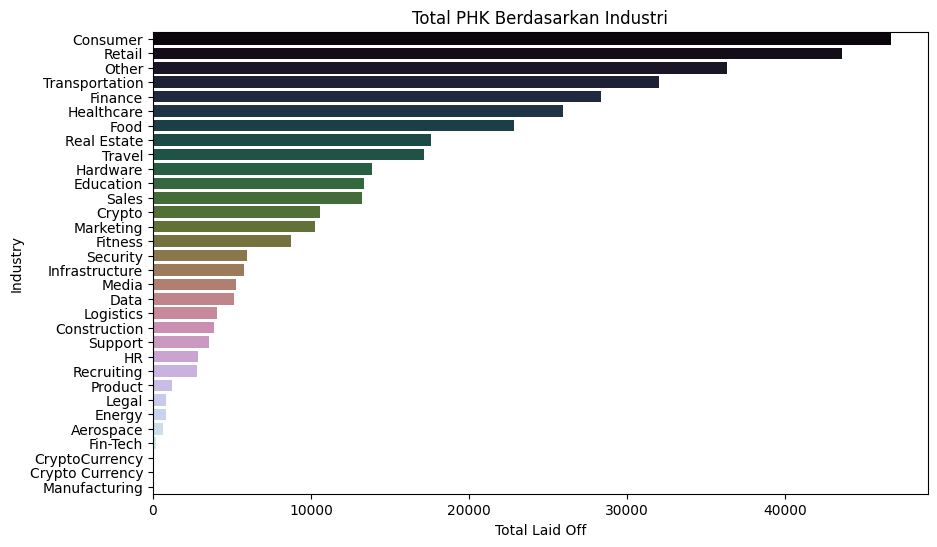

In [53]:
# Total PHK berdasarkan industri
total_layoffs_by_industry = world_layoffs_df.groupby('industry')['total_laid_off'].sum().reset_index().sort_values(by='total_laid_off', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(data=total_layoffs_by_industry, x='total_laid_off', y='industry', palette='cubehelix')
plt.title('Total PHK Berdasarkan Industri')
plt.xlabel('Total Laid Off')
plt.ylabel('Industry')
plt.show()

C:\Users\restu firmansyah\AppData\Local\Temp\ipykernel_13428\3061146853.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_layoffs_by_stage, x='total_laid_off', y='stage', palette='plasma')


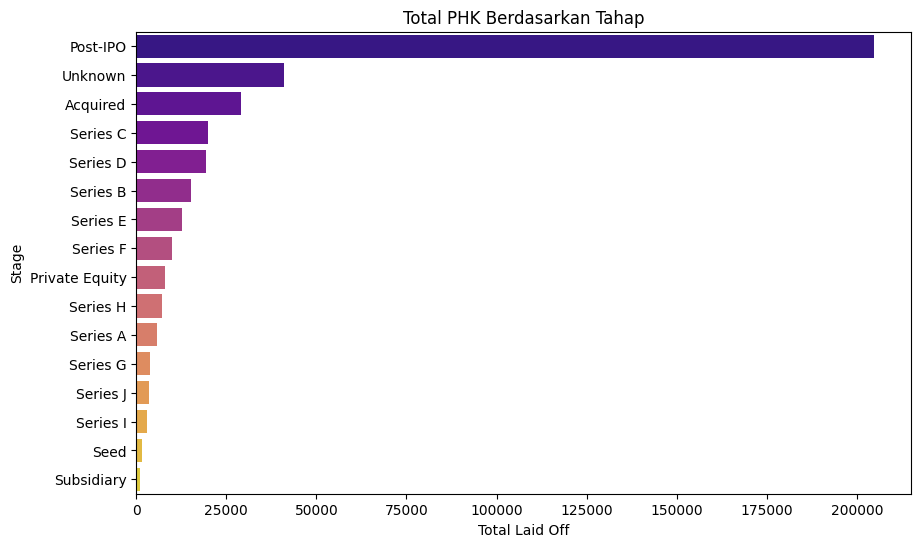

In [54]:
# Total PHK berdasarkan tahap
total_layoffs_by_stage = world_layoffs_df.groupby('stage')['total_laid_off'].sum().reset_index().sort_values(by='total_laid_off', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(data=total_layoffs_by_stage, x='total_laid_off', y='stage', palette='plasma')
plt.title('Total PHK Berdasarkan Tahap')
plt.xlabel('Total Laid Off')
plt.ylabel('Stage')
plt.show()

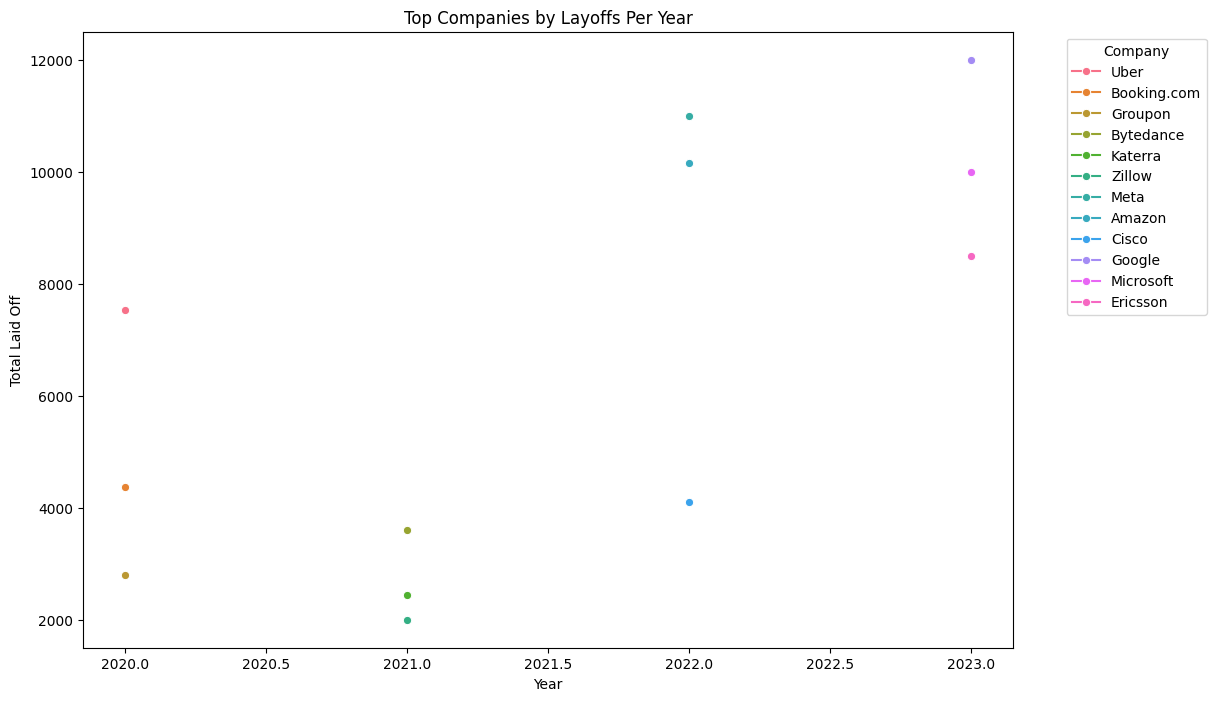

In [55]:
# Perusahaan dengan jumlah PHK per tahun terbanyak
company_year = world_layoffs_df.groupby(['company', 'year'])['total_laid_off'].sum().reset_index()
company_year['ranking'] = company_year.groupby('year')['total_laid_off'].rank(method='dense', ascending=False)
top_companies_per_year = company_year[company_year['ranking'] <= 3].sort_values(by=['year', 'total_laid_off'], ascending=[True, False])
plt.figure(figsize=(12, 8))
sns.lineplot(data=top_companies_per_year, x='year', y='total_laid_off', hue='company', marker='o')
plt.title('Top Companies by Layoffs Per Year')
plt.xlabel('Year')
plt.ylabel('Total Laid Off')
plt.legend(title='Company', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

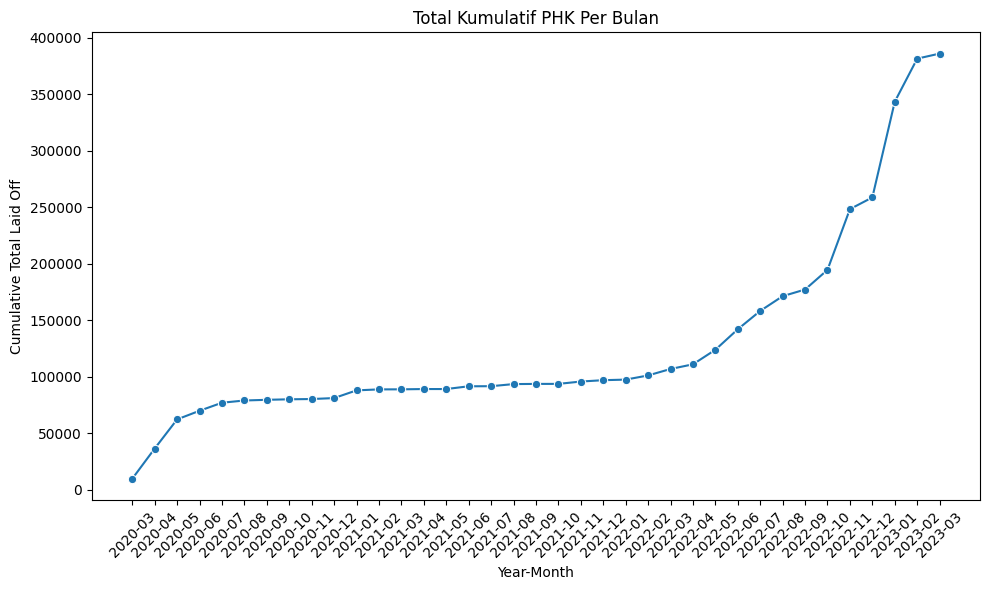

In [56]:
# Total kumulatif PHK per bulan
world_layoffs_df['year_month'] = pd.to_datetime(world_layoffs_df['date']).dt.to_period('M')
total_layoffs_by_month = world_layoffs_df.groupby('year_month')['total_laid_off'].sum().reset_index()
total_layoffs_by_month['rolling_total_layoffs'] = total_layoffs_by_month['total_laid_off'].cumsum()

# Convert year_month to string for better plotting with seaborn
total_layoffs_by_month['year_month'] = total_layoffs_by_month['year_month'].astype(str)

plt.figure(figsize=(10, 6))
sns.lineplot(data=total_layoffs_by_month, x='year_month', y='rolling_total_layoffs', marker='o')
plt.title('Total Kumulatif PHK Per Bulan')
plt.xlabel('Year-Month')
plt.ylabel('Cumulative Total Laid Off')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
